In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/jiahu/Desktop/Telco/Telco_customer_churn.csv')
df.head(6)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [4]:
# change teh data type of 'total charges' to float
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [5]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [6]:
# loop through the columns to get unique values per column
for i in df.columns:
    if df[i].dtype == 'O':
        print(f"Unique {i}'s count: {df[i].nunique()}")
        print(f"{df[i].unique()}'\n")
    else:
        pass

Unique CustomerID's count: 7043
['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']'

Unique Country's count: 1
['United States']'

Unique State's count: 1
['California']'

Unique City's count: 1129
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']'

Unique Lat Long's count: 1652
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']'

Unique Gender's count: 2
['Male' 'Female']'

Unique Senior Citizen's count: 2
['No' 'Yes']'

Unique Partner's count: 2
['No' 'Yes']'

Unique Dependents's count: 2
['No' 'Yes']'

Unique Phone Service's count: 2
['Yes' 'No']'

Unique Multiple Lines's count: 3
['No' 'Yes' 'No phone service']'

Unique Internet Service's count: 3
['DSL' 'Fiber optic' 'No']'

Unique Online Security's count: 3
['Yes' 'No' 'No internet service']'

Unique Online Backup's count: 3
['Yes' 'No' 'No internet

In [7]:
# check missing values
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
# drop rows with missing value for simplicity
df = df.dropna(how='any',subset=['Total Charges'])

In [9]:
# Understand churn reason
df.groupby('Churn Reason')['CustomerID'].nunique().sort_values(ascending=False)

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: C

## countplot of categorical data and churn label

In [10]:
# define plot style
plt.style.use("fivethirtyeight")

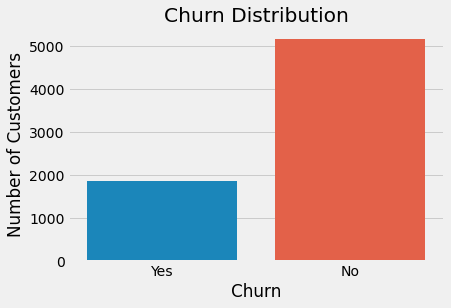

In [11]:
# Churn
ax = sns.countplot(x=df['Churn Label'], data = df)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Distribution')
plt.show()

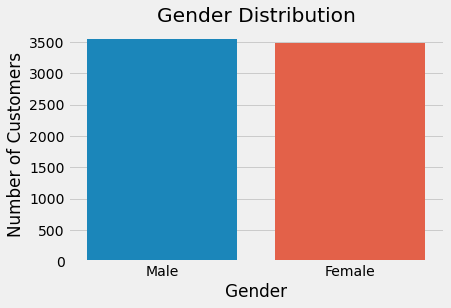

In [12]:
# Gender
ax = sns.countplot(x=df['Gender'], data = df)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')
plt.show()

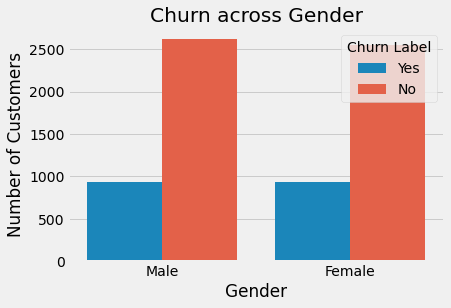

In [13]:
# Churn across Gender
ax = sns.countplot(x=df['Gender'], hue = df['Churn Label'], data = df)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Gender')
ax.set_title('Churn across Gender')
plt.show()

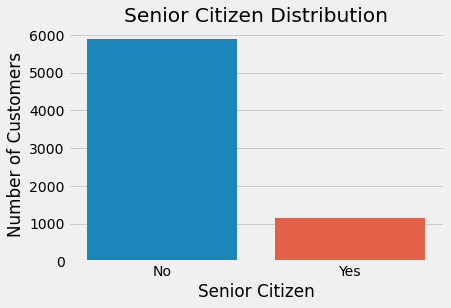

In [14]:
# Senior Citizen
ax = sns.countplot(x=df['Senior Citizen'], data = df)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Senior Citizen')
ax.set_title('Senior Citizen Distribution')
plt.show()

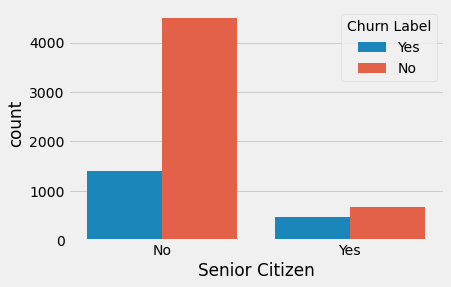

In [15]:
# Churn across Senior Citizen 
ax = sns.countplot(x=df['Senior Citizen'], hue = df['Churn Label'], data = df)
plt.show()

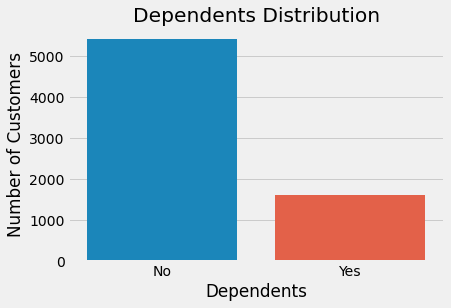

In [16]:
# Dependents
ax = sns.countplot(x=df['Dependents'], data = df)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Dependents')
ax.set_title('Dependents Distribution')
plt.show()

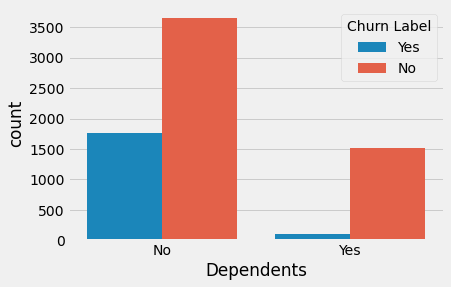

In [17]:
# Churn across Dependents
ax = sns.countplot(x=df['Dependents'], hue = df['Churn Label'], data = df)
plt.show()

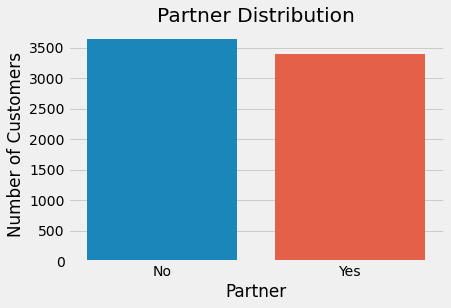

In [18]:
# Partner
ax = sns.countplot(x=df['Partner'], data = df)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Partner')
ax.set_title('Partner Distribution')
plt.show()

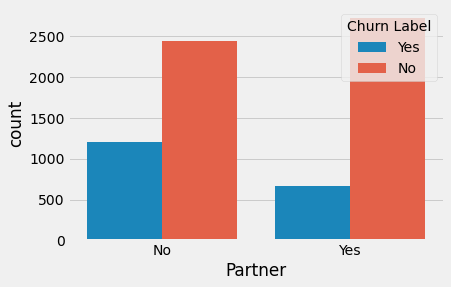

In [19]:
# plot Partner vs. churn
ax = sns.countplot(x=df['Partner'], hue = df['Churn Label'], data = df)
plt.show()

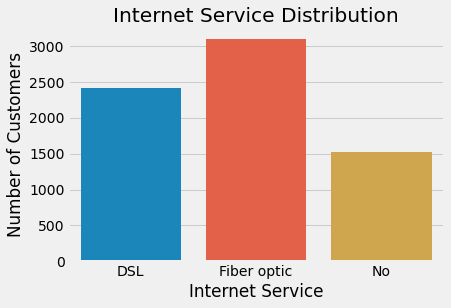

In [20]:
# Internet Service types
ax = sns.countplot(x=df['Internet Service'], data = df)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Internet Service')
ax.set_title('Internet Service Distribution')
plt.show()

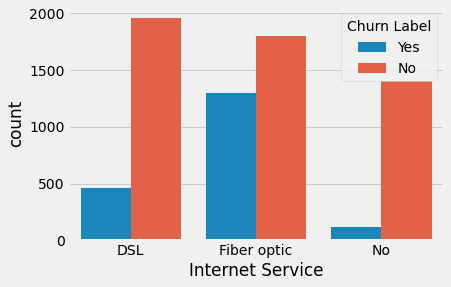

In [21]:
# Churn across Internet Service types
ax = sns.countplot(x=df['Internet Service'], hue = df['Churn Label'], data = df)
plt.show()

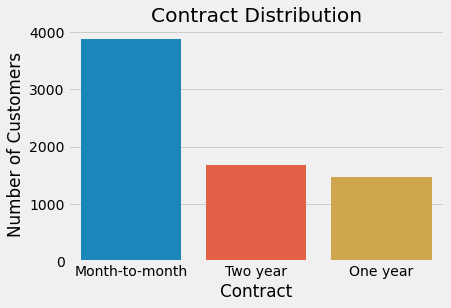

In [22]:
# Contract types
ax = sns.countplot(x=df['Contract'], data = df)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Contract')
ax.set_title('Contract Distribution')
plt.show()

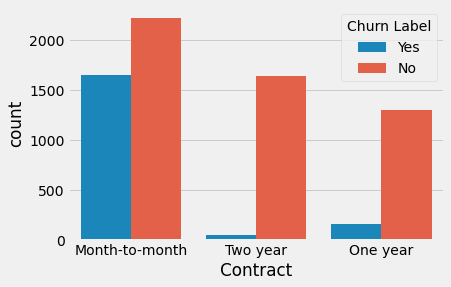

In [23]:
# Churn across Contract types
ax = sns.countplot(x=df['Contract'], hue = df['Churn Label'], data = df)
plt.show()

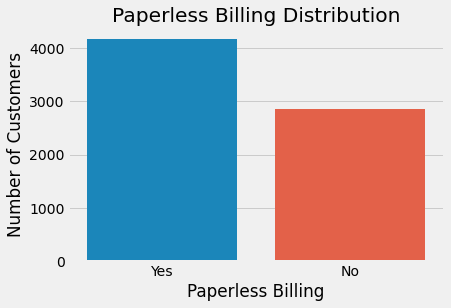

In [24]:
# Paperless Billing
ax = sns.countplot(x=df['Paperless Billing'], data = df)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Paperless Billing')
ax.set_title('Paperless Billing Distribution')
plt.show()

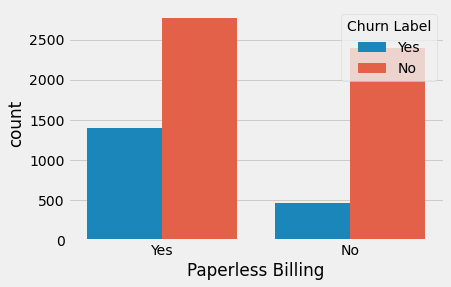

In [25]:
# plot Paperless Billing vs. churn
ax = sns.countplot(x=df['Paperless Billing'], hue = df['Churn Label'], data = df)
plt.show()

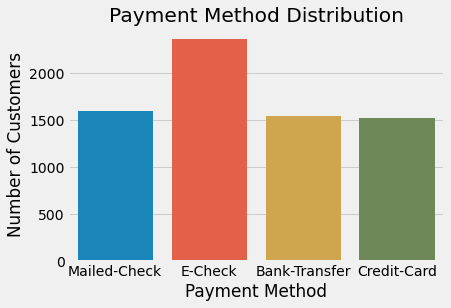

In [26]:
# Payment Method
payment = {"Electronic check":'E-Check',"Mailed check":'Mailed-Check',"Bank transfer (automatic)":'Bank-Transfer',"Credit card (automatic)":'Credit-Card'}
df['Payment Method'].replace(payment, inplace=True)
ax = sns.countplot(x=df['Payment Method'], data = df)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Payment Method')
ax.set_title('Payment Method Distribution')
plt.show()

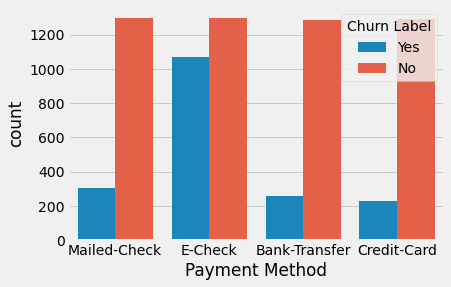

In [27]:
# plot Payment Method vs. churn
ax = sns.countplot(x=df['Payment Method'], hue = df['Churn Label'], data = df)
plt.show()

## Boxplot of numeric data

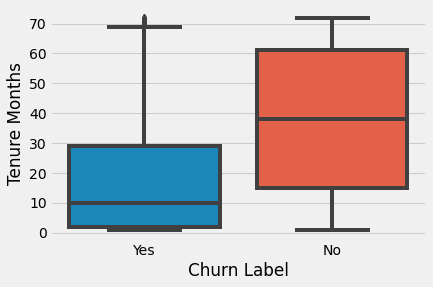

In [28]:
# plot tenure months vs. churn
ax = sns.boxplot(x= df['Churn Label'], y=df['Tenure Months'])
plt.show()

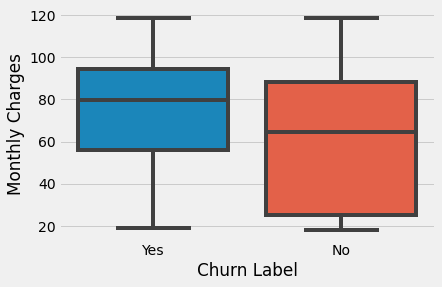

In [29]:
# plot Monthly Charges vs. churn
ax = sns.boxplot(x= df['Churn Label'], y=df['Monthly Charges'])
plt.show()

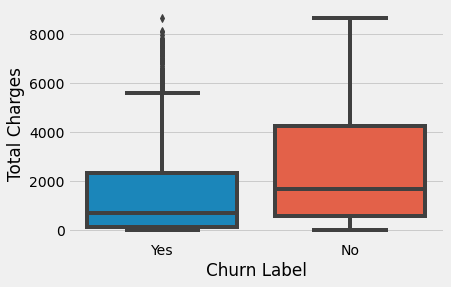

In [30]:
# plot Total Charges vs. churn
ax = sns.boxplot(x= df['Churn Label'], y=df['Total Charges'])
plt.show()

# Check for Outliers in Numerical Features

In [31]:
numerical_features = ['Tenure Months','Monthly Charges','Total Charges']
df_num = df[numerical_features]
df_num.describe()

,Tenure Months,Monthly Charges,Total Charges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [32]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5*IQR))|(df_num > (Q3 + 1.5*IQR))).any()

Tenure Months      False
Monthly Charges    False
Total Charges      False
dtype: bool

# Feature Engineering

In [33]:
df['Number of Additional Services'] = (df[['Online Security','Online Backup','Device Protection',
                                           'Tech Support','Streaming TV','Streaming Movies']]=="Yes").sum(axis=1)

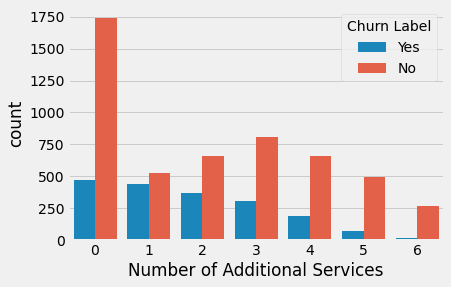

In [34]:
ax = sns.countplot(x=df['Number of Additional Services'], hue = df['Churn Label'], data = df)
plt.show()